In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn 

In [3]:
data_confirmed = pd.read_csv('covid_19_confirmed_v1.csv')
data_deaths = pd.read_csv('covid_19_deaths_v1.csv')
data_recovered = pd.read_csv('covid_19_recovered_v1.csv')
data_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


In [4]:
data_confirmed.shape

(276, 498)

In [5]:
data_deaths.shape

(277, 498)

In [6]:
data_recovered.shape

(262, 498)

In [7]:
data_confirmed.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [8]:
data_deaths.dtypes

Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object

In [9]:
data_recovered.dtypes

Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object

In [10]:
copy_data_confirmed = pd.DataFrame.copy(data_confirmed)
copy_data_confirmed.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)
grouped = copy_data_confirmed.groupby('Country/Region').sum()
final = grouped.reset_index().melt(id_vars='Country/Region', var_name='date')
final['date'] = pd.to_datetime(final['date'])
final.head()


/tmp/ipykernel_3642/4090148235.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final['date'] = pd.to_datetime(final['date'])


,Country/Region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [11]:
top_countries = final.groupby('Country/Region')['value'].sum().sort_values(ascending=False)
top_countries.head(5)

Country/Region
US        6047736004
India     3226953590
Brazil    2653620509
Russia     930548859
France     855026731
Name: value, dtype: int64

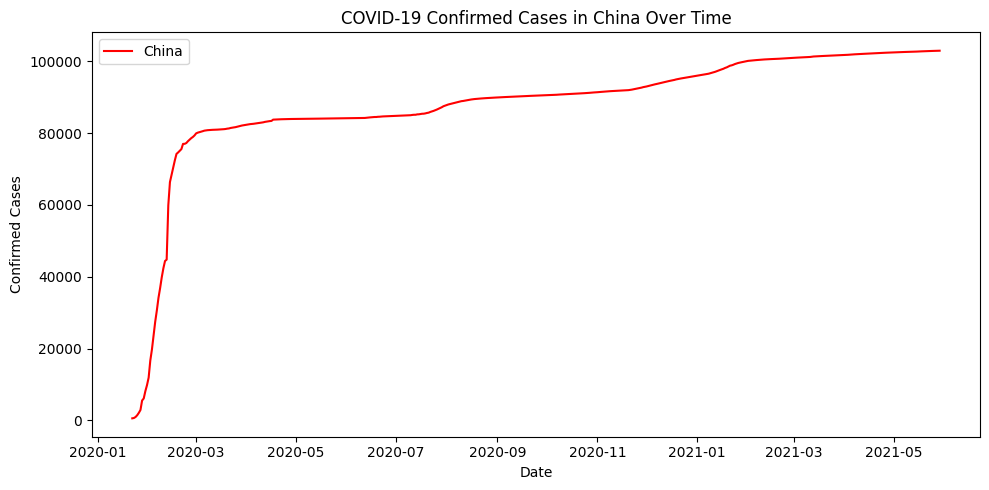

In [12]:
china_data = final[final["Country/Region"] == "China"]

plt.figure(figsize=(10, 5))
plt.plot(china_data["date"], china_data["value"], color='red', label='China')

plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases in China Over Time")
plt.legend()
plt.tight_layout()
plt.show()

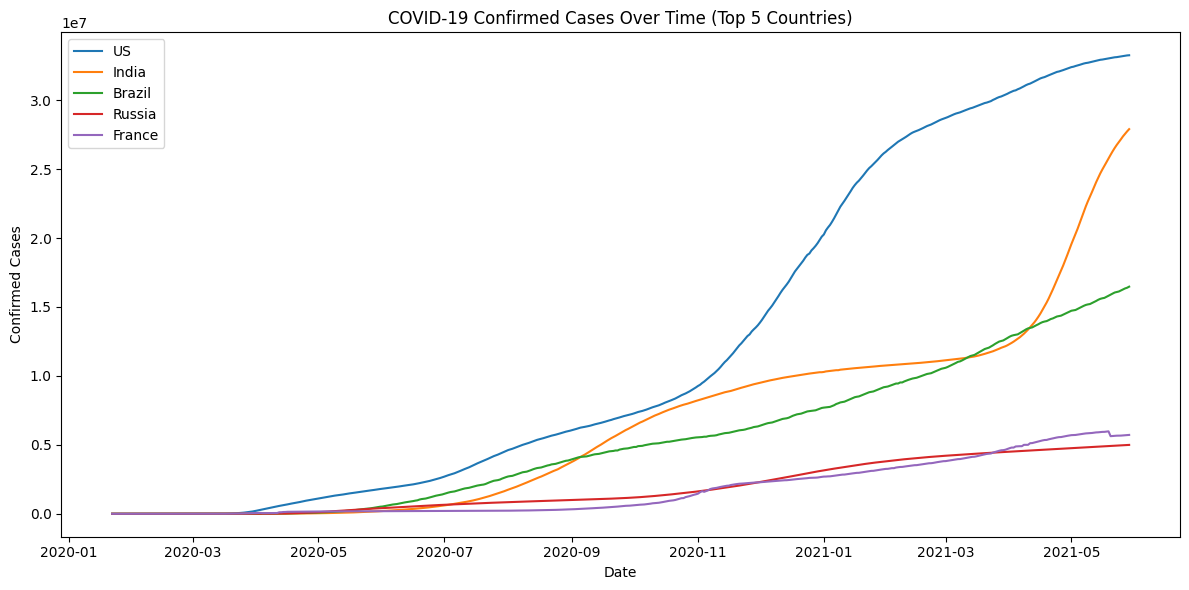

In [13]:
countries = ["US", "India", "Brazil", "Russia", "France"]
selected_data = final[final["Country/Region"].isin(countries)]
plt.figure(figsize=(12, 6))

# Loop through each country and plot
for country in countries:
    country_data = selected_data[selected_data["Country/Region"] == country]
    plt.plot(country_data["date"], country_data["value"], label=country)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Over Time (Top 5 Countries)")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
data_deaths.columns = data_deaths.iloc[0]
data_deaths  = data_deaths.drop(0).reset_index(drop=True)
data_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [15]:
data_recovered.columns = data_recovered.iloc[0]
data_recovered = data_recovered.drop(0).reset_index(drop=True)
data_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,NaN,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594


In [16]:
data_deaths['Lat'].fillna(method='ffill', inplace=True)
data_deaths['Long'].fillna(method='ffill', inplace=True)
data_deaths['Province/State'].fillna("All Provinces", inplace=True)
data_deaths.isnull().sum()

/tmp/ipykernel_3642/2624976273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_deaths['Lat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_3642/2624976273.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_deaths['Lat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_3642/2624976273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method

0
Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
5/25/21           0
5/26/21           0
5/27/21           0
5/28/21           0
5/29/21           0
Length: 498, dtype: int64

In [17]:
data_recovered['Lat'].fillna(method='ffill', inplace=True)
data_recovered['Long'].fillna(method='ffill', inplace=True)
data_recovered['Province/State'].fillna("All Provinces", inplace=True)
data_recovered.isnull().sum()

/tmp/ipykernel_3642/1687334893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_recovered['Lat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_3642/1687334893.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_recovered['Lat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_3642/1687334893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace 

0
Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
5/25/21           0
5/26/21           0
5/27/21           0
5/28/21           0
5/29/21           0
Length: 498, dtype: int64

In [18]:
data_confirmed['Lat'].fillna(method="ffill", inplace=True)
data_confirmed['Long'].fillna(method="ffill",inplace=True)
data_confirmed['Province/State'].fillna("All Provinces", inplace=True)
data_confirmed.isnull().sum()

/tmp/ipykernel_3642/1401567963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_confirmed['Lat'].fillna(method="ffill", inplace=True)
/tmp/ipykernel_3642/1401567963.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_confirmed['Lat'].fillna(method="ffill", inplace=True)
/tmp/ipykernel_3642/1401567963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace 

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
5/25/21           0
5/26/21           0
5/27/21           0
5/28/21           0
5/29/21           0
Length: 498, dtype: int64

In [19]:
data_deaths.dtypes

0
Province/State    object
Country/Region    object
Lat               object
Long              object
1/22/20           object
                   ...  
5/25/21           object
5/26/21           object
5/27/21           object
5/28/21           object
5/29/21           object
Length: 498, dtype: object

In [20]:
data_recovered['Lat'] = data_recovered['Lat'].astype(float)
data_recovered['Long'] = data_recovered['Long'].astype(float)
data_recovered['Province/State'] = data_recovered['Province/State'].astype('string')
data_recovered['Country/Region'] = data_recovered['Country/Region'].astype('string')
obj = data_recovered.select_dtypes(include=object).columns

for every_obj in obj:
    data_recovered[every_obj] = pd.to_numeric(data_recovered[every_obj])
data_recovered.dtypes

0
Province/State    string[python]
Country/Region    string[python]
Lat                      float64
Long                     float64
1/22/20                    int64
                       ...      
5/25/21                    int64
5/26/21                    int64
5/27/21                    int64
5/28/21                    int64
5/29/21                    int64
Length: 498, dtype: object

In [21]:
data_deaths['Lat'] = data_deaths['Lat'].astype(float)
data_deaths['Long'] = data_deaths['Long'].astype(float)
data_deaths['Province/State'] = data_deaths['Province/State'].astype('string')
data_deaths['Country/Region'] = data_deaths['Country/Region'].astype('string')
obj = data_deaths.select_dtypes(include=object).columns

for every_obj in obj:
    data_deaths[every_obj] = pd.to_numeric(data_deaths[every_obj])
data_deaths.dtypes

0
Province/State    string[python]
Country/Region    string[python]
Lat                      float64
Long                     float64
1/22/20                    int64
                       ...      
5/25/21                    int64
5/26/21                    int64
5/27/21                    int64
5/28/21                    int64
5/29/21                    int64
Length: 498, dtype: object

In [22]:

fra_ger_ita_cases = final[final['Country/Region'].isin(['Germany', 'France', 'Italy'])]
fra_ger_ita_cases.sort_values(['Country/Region','date'], inplace=True)
fra_ger_ita_cases

/tmp/ipykernel_3642/1927561997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fra_ger_ita_cases.sort_values(['Country/Region','date'], inplace=True)


,Country/Region,date,value
62,France,2020-01-22,0
255,France,2020-01-23,0
448,France,2020-01-24,2
641,France,2020-01-25,3
834,France,2020-01-26,3
...,...,...,...
94462,Italy,2021-05-25,4197892
94655,Italy,2021-05-26,4201827
94848,Italy,2021-05-27,4205970
95041,Italy,2021-05-28,4209707


      Country/Region       date    value
95211         France 2021-05-29  5719877
95215        Germany 2021-05-29  3684672
95234          Italy 2021-05-29  4213055


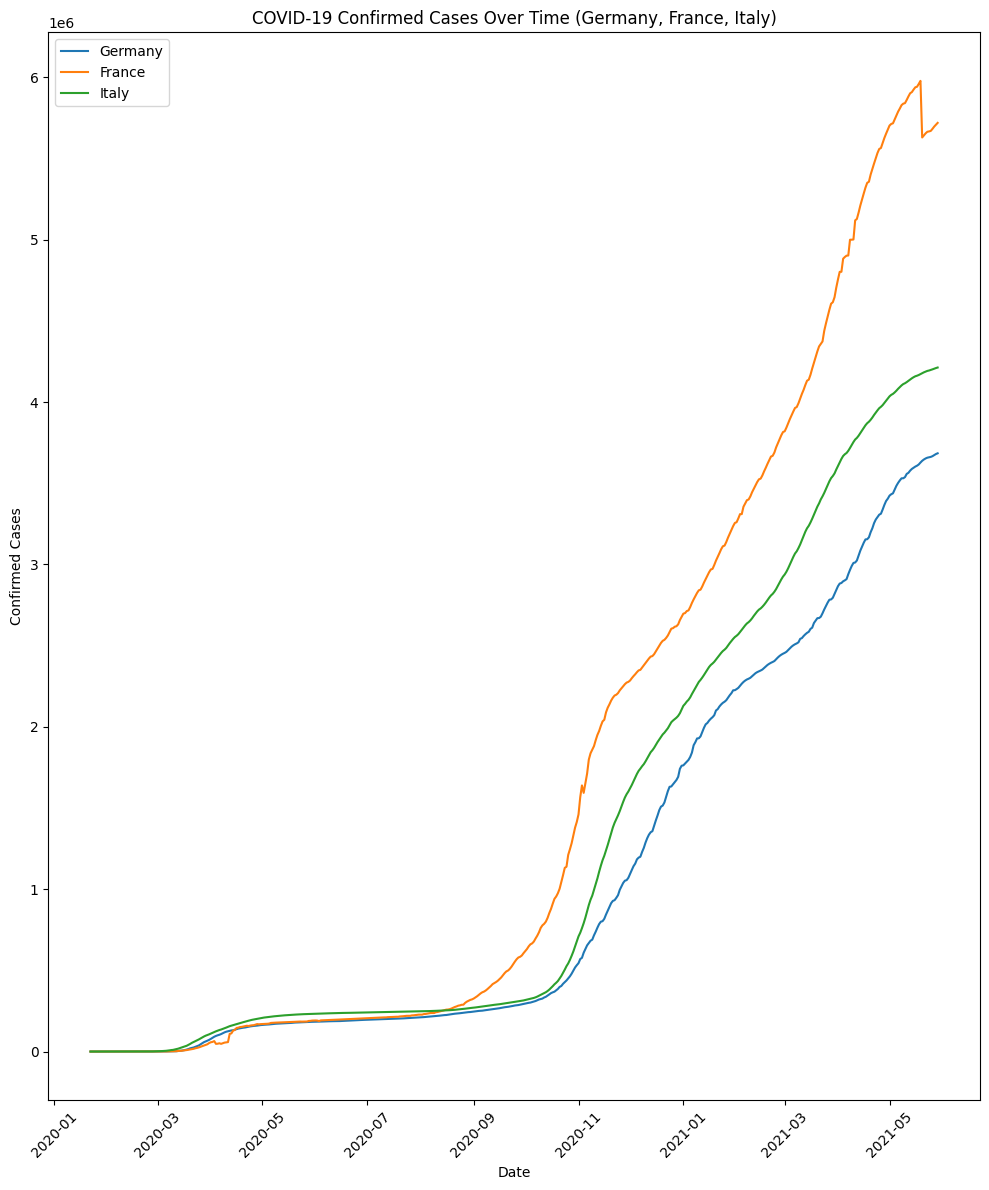

In [23]:
plt.figure(figsize=(10, 12))

peak_days = fra_ger_ita_cases.loc[fra_ger_ita_cases.groupby('Country/Region')['date'].idxmax()]
print(peak_days)
for country in ['Germany', 'France', 'Italy']:
    country_data = fra_ger_ita_cases[fra_ger_ita_cases['Country/Region'] == country]
    plt.plot(country_data['date'], country_data['value'], label=country)

plt.xlabel('Date')
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Over Time (Germany, France, Italy)")
plt.legend()  
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [24]:
data_recovered_copy = pd.DataFrame.copy(data_recovered)
data_recovered_copy.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)
grouped_recovered = data_recovered_copy.groupby('Country/Region').sum()
final_recovered = grouped_recovered.reset_index().melt(id_vars='Country/Region', var_name='date')
final_recovered['date'] = pd.to_datetime(final_recovered['date'])
final_recovered

/tmp/ipykernel_3642/2575071420.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_recovered['date'] = pd.to_datetime(final_recovered['date'])


,Country/Region,date,value
0,Afghanistan,2020-01-22,0.0
1,Albania,2020-01-22,0.0
2,Algeria,2020-01-22,0.0
3,Andorra,2020-01-22,0.0
4,Angola,2020-01-22,0.0
...,...,...,...
95337,Vietnam,2021-05-29,2896.0
95338,West Bank and Gaza,2021-05-29,300524.0
95339,Yemen,2021-05-29,3399.0
95340,Zambia,2021-05-29,91594.0


/tmp/ipykernel_3642/1379310931.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


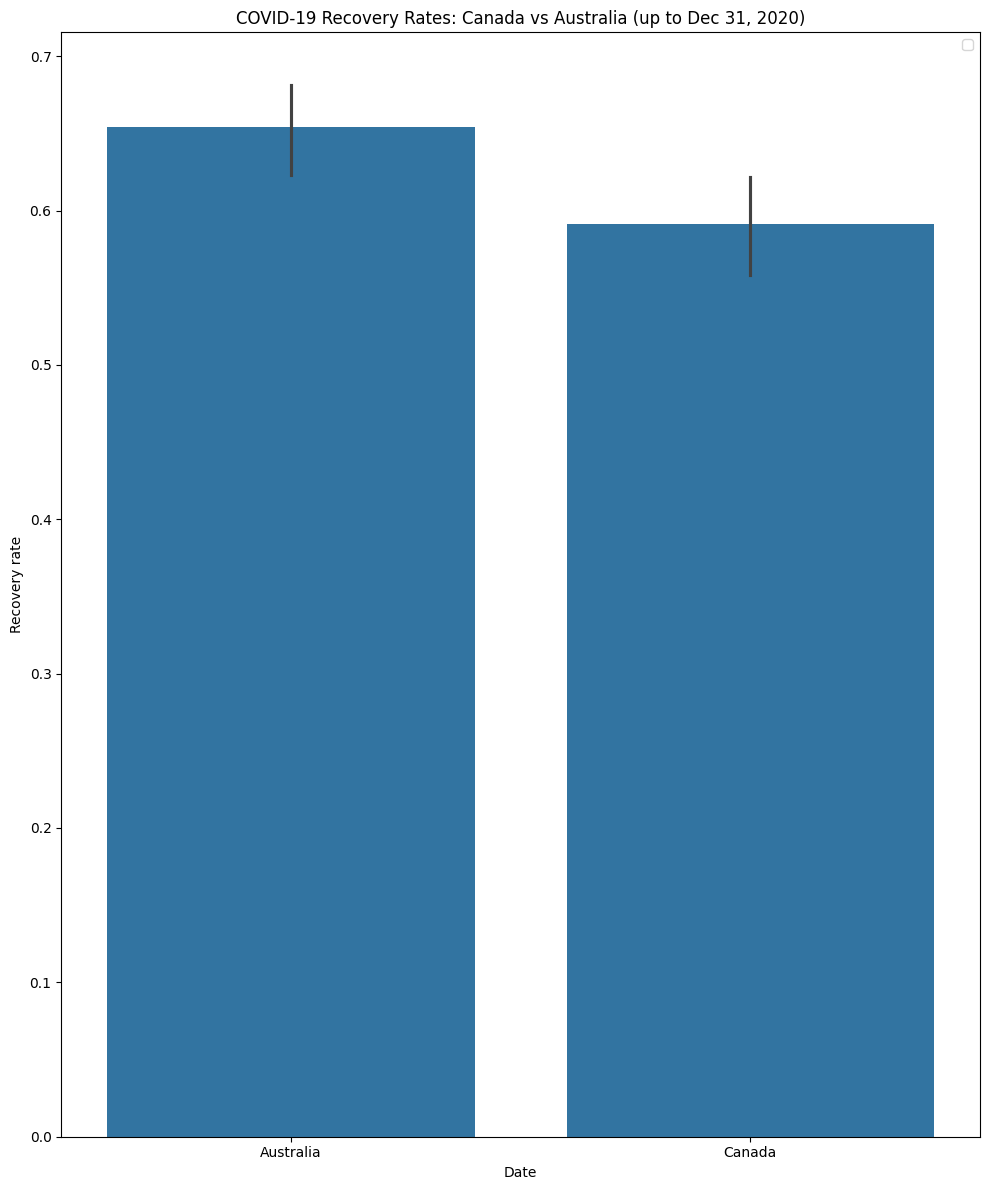

In [25]:
Can_Aus_recovered = final_recovered[final_recovered['Country/Region'].isin(['Canada', 'Australia'])]
Can_Aus_confirmed = final[final['Country/Region'].isin(['Canada', 'Australia'])]
Can_Aus_recovered_2020 = Can_Aus_recovered[Can_Aus_recovered['date'] <= '2020-12-31']
Can_Aus_confirmed_2020 = Can_Aus_confirmed[Can_Aus_confirmed['date'] <= '2020-12-31']

plt.figure(figsize=(10,12))

sbn.barplot(x=Can_Aus_recovered_2020['Country/Region'],y=(Can_Aus_recovered_2020['value']/Can_Aus_confirmed_2020['value']))
plt.xlabel("Date")
plt.ylabel("Recovery rate")
plt.title("COVID-19 Recovery Rates: Canada vs Australia (up to Dec 31, 2020)")
plt.legend()
plt.tight_layout()
plt.savefig('output.svg')
plt.show()

In [26]:
confirmed_canada = data_confirmed[data_confirmed['Country/Region']=='Canada']
confirmed_canada_copy = pd.DataFrame.copy(confirmed_canada)
confirmed_canada_copy.drop(columns=['Country/Region', 'Lat', 'Long'], inplace=True)
confirmed_canada_copy = confirmed_canada_copy.groupby('Province/State').sum()
confirmed_canada_copy = confirmed_canada_copy.reset_index().melt(id_vars='Province/State', var_name='date')
confirmed_canada_copy

,Province/State,date,value
0,Alberta,1/22/20,0
1,British Columbia,1/22/20,0
2,Diamond Princess,1/22/20,0
3,Grand Princess,1/22/20,0
4,Manitoba,1/22/20,0
...,...,...,...
7899,Prince Edward Island,5/29/21,200
7900,Quebec,5/29/21,369728
7901,Repatriated Travellers,5/29/21,13
7902,Saskatchewan,5/29/21,46464


In [27]:
deaths_canada = data_deaths[data_deaths['Country/Region']=='Canada']
deaths_canada_copy = pd.DataFrame.copy(deaths_canada)

deaths_canada_copy.drop(columns=['Country/Region', 'Lat', 'Long'], inplace=True)
deaths_canada_copy = deaths_canada_copy.groupby('Province/State').sum()
deaths_canada_copy = deaths_canada_copy.reset_index().melt(id_vars='Province/State', var_name='date')
deaths_canada_copy['date'] = pd.to_datetime(deaths_canada_copy['date'])
deaths_canada_copy

/tmp/ipykernel_3642/1990115876.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_canada_copy['date'] = pd.to_datetime(deaths_canada_copy['date'])


,Province/State,date,value
0,Alberta,2020-01-22,0.0
1,British Columbia,2020-01-22,0.0
2,Diamond Princess,2020-01-22,0.0
3,Grand Princess,2020-01-22,0.0
4,Manitoba,2020-01-22,0.0
...,...,...,...
7899,Prince Edward Island,2021-05-29,0.0
7900,Quebec,2021-05-29,11125.0
7901,Repatriated Travellers,2021-05-29,0.0
7902,Saskatchewan,2021-05-29,537.0


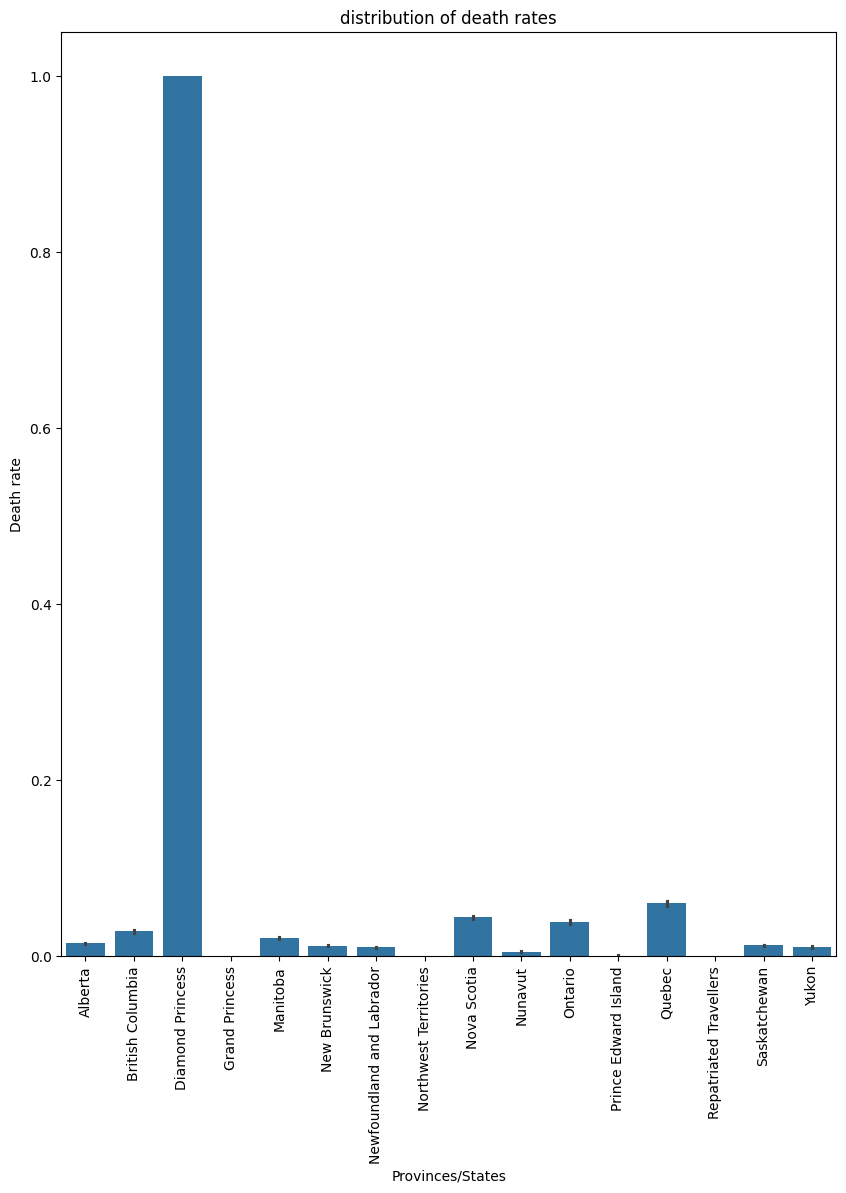

In [28]:
plt.figure(figsize=(10,12))

sbn.barplot(x=deaths_canada_copy['Province/State'],y=(deaths_canada_copy['value']/confirmed_canada_copy['value']))
plt.xticks(rotation=90)
plt.xlabel("Provinces/States")
plt.ylabel("Death rate")
plt.title("distribution of death rates")

plt.savefig('output.svg')
plt.show()


In [29]:
wide_data_deaths = pd.melt(data_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="date", value_name="deaths")
wide_data_deaths['date'] = pd.to_datetime(wide_data_deaths['date'])
wide_data_deaths

/tmp/ipykernel_3642/415121116.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wide_data_deaths['date'] = pd.to_datetime(wide_data_deaths['date'])


,Province/State,Country/Region,Lat,Long,date,deaths
0,All Provinces,Afghanistan,33.939110,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.153300,20.168300,2020-01-22,0.0
2,All Provinces,Algeria,28.033900,1.659600,2020-01-22,0.0
3,All Provinces,Andorra,42.506300,1.521800,2020-01-22,0.0
4,All Provinces,Angola,-11.202700,17.873900,2020-01-22,0.0
...,...,...,...,...,...,...
136339,All Provinces,Vietnam,14.058324,108.277199,2021-05-29,47.0
136340,All Provinces,West Bank and Gaza,31.952200,35.233200,2021-05-29,3492.0
136341,All Provinces,Yemen,15.552727,48.516388,2021-05-29,1319.0
136342,All Provinces,Zambia,-13.133897,27.849332,2021-05-29,1276.0


In [30]:
grouped_deaths = wide_data_deaths.groupby('Country/Region')['deaths'].sum()
grouped_deaths

Country/Region
Afghanistan           669075.0
Albania               375955.0
Algeria               834080.0
Andorra                32100.0
Angola                116489.0
                        ...   
Vietnam                10220.0
West Bank and Gaza    440368.0
Yemen                 237613.0
Zambia                205990.0
Zimbabwe              237234.0
Name: deaths, Length: 193, dtype: float64

In [31]:
avg_deaths = wide_data_deaths.groupby('Country/Region')['deaths'].agg('mean')
avg_deaths.sort_values(ascending=False, inplace=True)
avg_deaths.head(5)

Country/Region
US        250234.906883
Brazil    147013.327935
India      89935.410931
Mexico     87057.647773
Italy      52633.382591
Name: deaths, dtype: float64

In [32]:
wide_data_deaths_US = wide_data_deaths[wide_data_deaths['Country/Region']=='US']
wide_data_deaths_US.sort_values('date', inplace=True)
wide_data_deaths_US

/tmp/ipykernel_3642/40055341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_data_deaths_US.sort_values('date', inplace=True)


,Province/State,Country/Region,Lat,Long,date,deaths
251,All Provinces,US,40.0,-100.0,2020-01-22,0.0
527,All Provinces,US,40.0,-100.0,2020-01-23,0.0
803,All Provinces,US,40.0,-100.0,2020-01-24,0.0
1079,All Provinces,US,40.0,-100.0,2020-01-25,0.0
1355,All Provinces,US,40.0,-100.0,2020-01-26,0.0
...,...,...,...,...,...,...
135215,All Provinces,US,40.0,-100.0,2021-05-25,590941.0
135491,All Provinces,US,40.0,-100.0,2021-05-26,591950.0
135767,All Provinces,US,40.0,-100.0,2021-05-27,593288.0
136043,All Provinces,US,40.0,-100.0,2021-05-28,593963.0


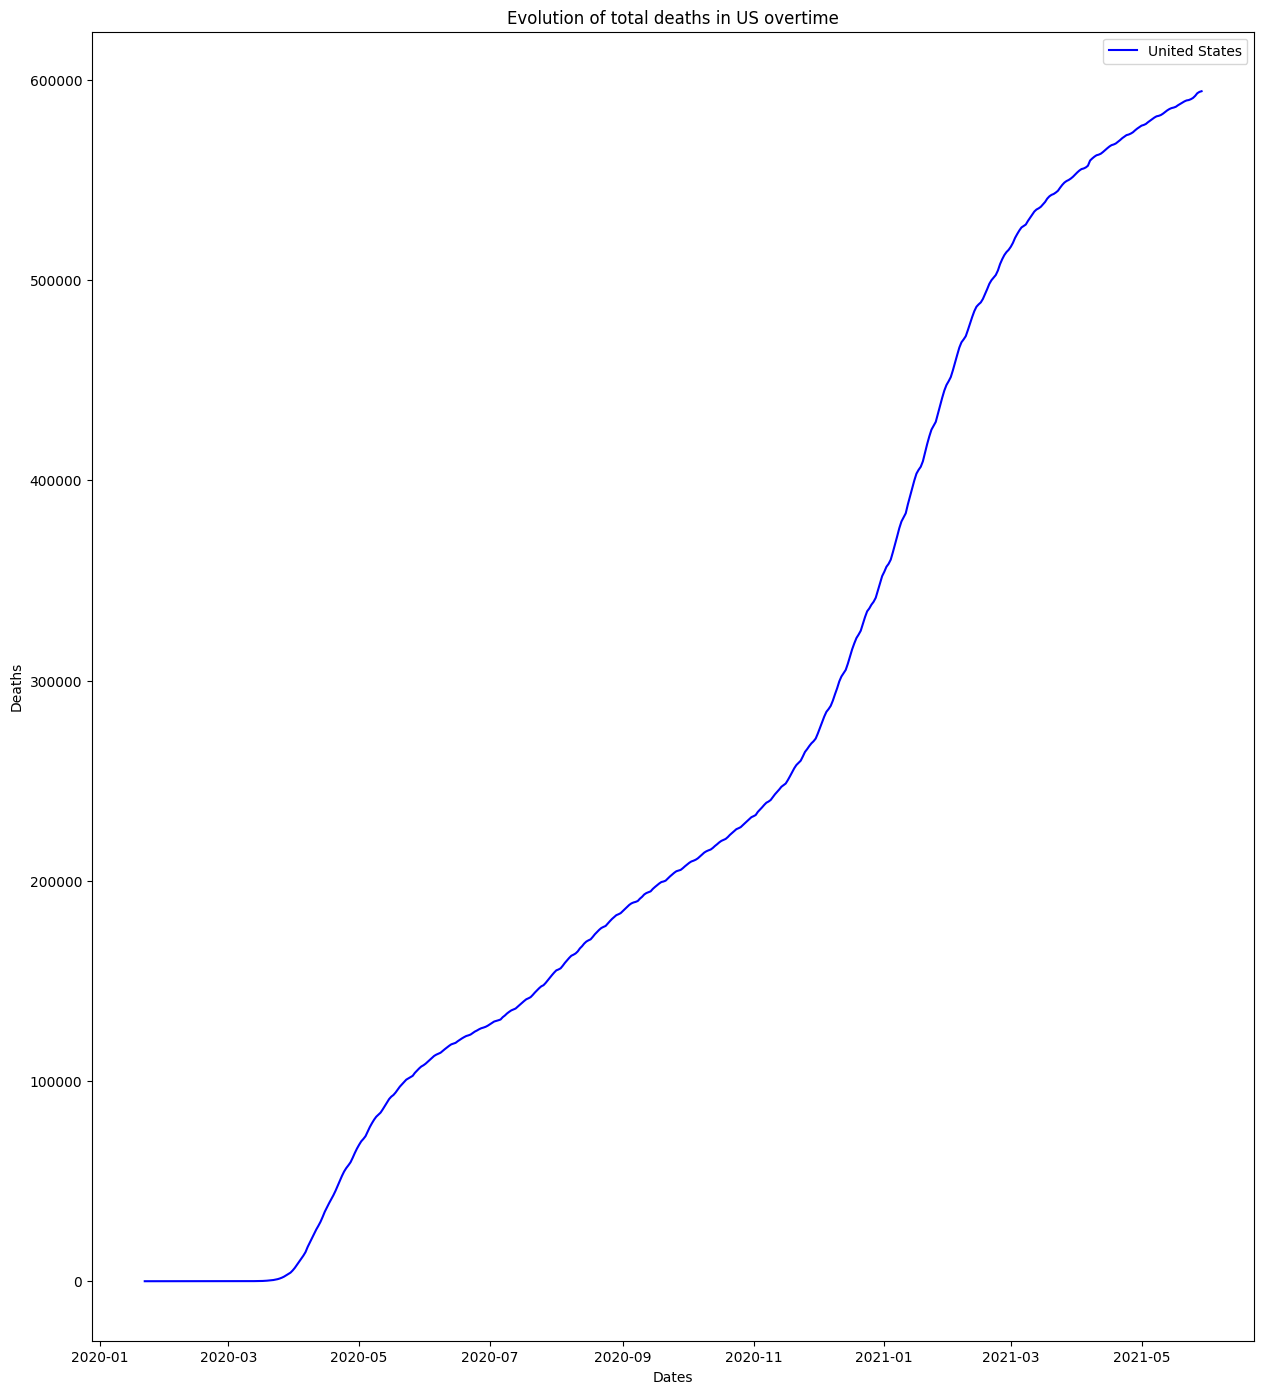

In [33]:
plt.figure(figsize=(15,17))
plt.plot(wide_data_deaths_US['date'], wide_data_deaths_US['deaths'], label="United States", color='blue')

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("Evolution of total deaths in US overtime")
plt.legend()
plt.savefig('output.svg')
plt.show()

In [34]:
wide_data_deaths.isnull().sum()
na = wide_data_deaths[wide_data_deaths.isna().any(axis=1)]
na

,Province/State,Country/Region,Lat,Long,date,deaths
24566,All Provinces,Algeria,28.0339,1.6596,2020-04-20,NaN


In [35]:
wide_data_confirmedCases = pd.melt(data_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="date", value_name="Confirmed Cases")
wide_data_confirmedCases['date'] = pd.to_datetime(wide_data_confirmedCases['date'])
wide_data_confirmedCases['Province/State'] = wide_data_confirmedCases['Province/State'].astype('string')
wide_data_confirmedCases['Country/Region'] = wide_data_confirmedCases['Country/Region'].astype('string')

wide_data_confirmedCases.isnull().sum()

/tmp/ipykernel_3642/121402897.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wide_data_confirmedCases['date'] = pd.to_datetime(wide_data_confirmedCases['date'])


Province/State     0
Country/Region     0
Lat                0
Long               0
date               0
Confirmed Cases    0
dtype: int64

In [36]:
wide_data_recovered = pd.melt(data_recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="date", value_name="recoveries")
wide_data_recovered['date'] = pd.to_datetime(wide_data_recovered['date'])
wide_data_recovered.isnull().sum()
na = wide_data_recovered[wide_data_recovered.isna().any(axis=1)]
wide_data_confirmedCases

/tmp/ipykernel_3642/2482783618.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wide_data_recovered['date'] = pd.to_datetime(wide_data_recovered['date'])


,Province/State,Country/Region,Lat,Long,date,Confirmed Cases
0,All Provinces,Afghanistan,33.939110,67.709953,2020-01-22,0
1,All Provinces,Albania,41.153300,20.168300,2020-01-22,0
2,All Provinces,Algeria,28.033900,1.659600,2020-01-22,0
3,All Provinces,Andorra,42.506300,1.521800,2020-01-22,0
4,All Provinces,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
136339,All Provinces,Vietnam,14.058324,108.277199,2021-05-29,6908
136340,All Provinces,West Bank and Gaza,31.952200,35.233200,2021-05-29,307838
136341,All Provinces,Yemen,15.552727,48.516388,2021-05-29,6731
136342,All Provinces,Zambia,-13.133897,27.849332,2021-05-29,94751


In [37]:
combined_data = pd.merge(wide_data_confirmedCases, wide_data_recovered, on=['Country/Region', 'Province/State', 'Lat', 'Long', 'date'], how='outer')
combined_data = combined_data.merge(wide_data_deaths, on=['Country/Region', 'Province/State', 'Lat', 'Long', 'date'], how='outer')
combined_data.fillna(0, inplace=True)




In [38]:
global_data = combined_data.groupby('date')[['Confirmed Cases', 'recoveries', 'deaths']].sum().reset_index()

global_data

,date,Confirmed Cases,recoveries,deaths
0,2020-01-22,557.0,30.0,17.0
1,2020-01-23,655.0,32.0,18.0
2,2020-01-24,941.0,39.0,26.0
3,2020-01-25,1433.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0
...,...,...,...,...
489,2021-05-25,167848207.0,104824935.0,3485788.0
490,2021-05-26,168416423.0,105380748.0,3498544.0
491,2021-05-27,168970791.0,106078106.0,3511297.0
492,2021-05-28,169470725.0,106633069.0,3523117.0


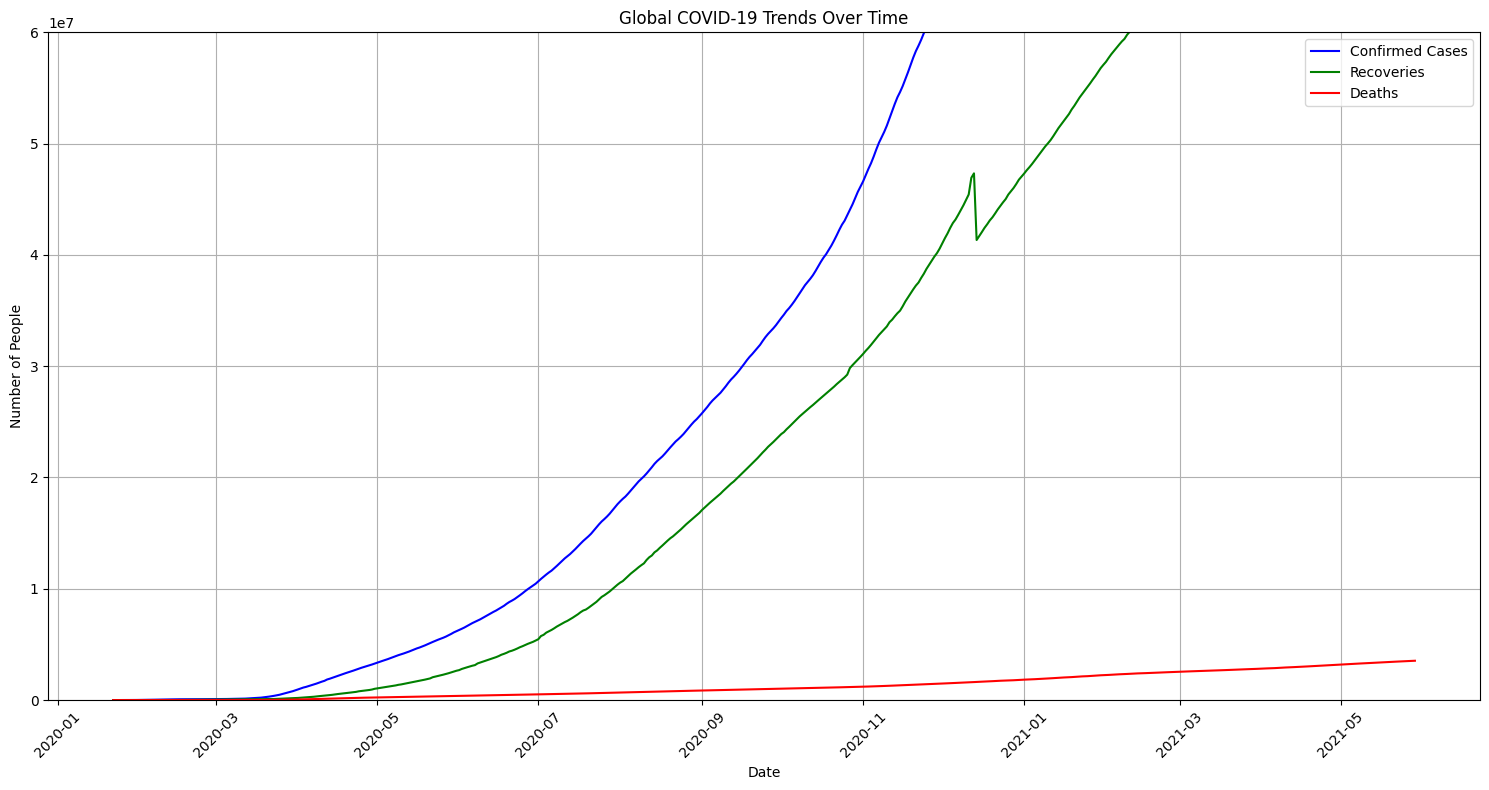

In [39]:



plt.figure(figsize=(15, 8))

plt.plot(global_data['date'], global_data['Confirmed Cases'], label='Confirmed Cases', color='blue')
plt.plot(global_data['date'], global_data['recoveries'], label='Recoveries', color='green')
plt.plot(global_data['date'], global_data['deaths'], label='Deaths', color='red')
plt.ylim(0, 60000000)
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Global COVID-19 Trends Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

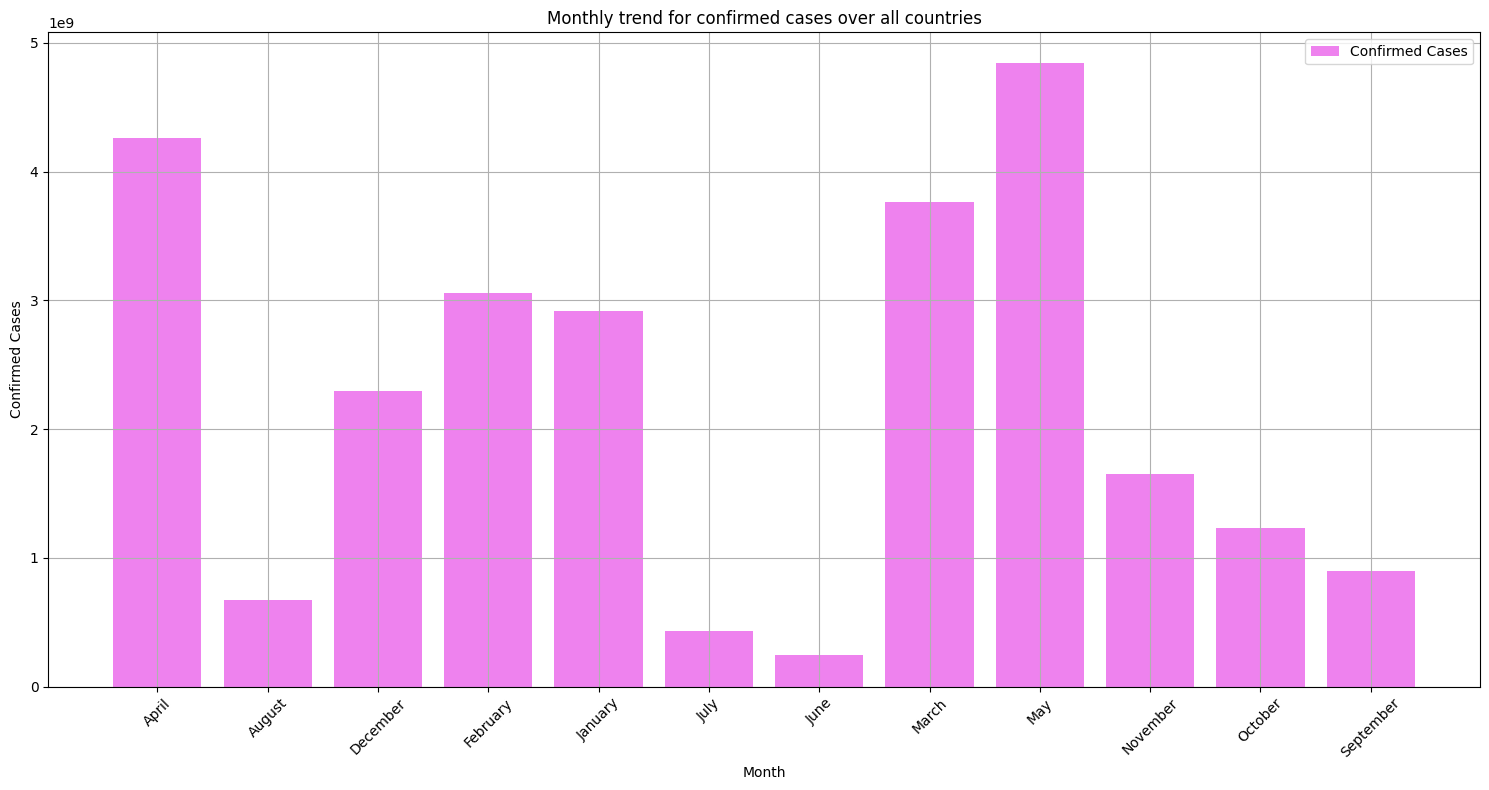

In [40]:
combined_data['Month'] = combined_data['date'].dt.strftime('%B')
combined_data2 = combined_data.groupby('Month')[['Confirmed Cases', 'recoveries', 'deaths']].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.bar(combined_data2['Month'], combined_data2['Confirmed Cases'], label='Confirmed Cases', color='violet')

plt.xlabel('Month')
plt.ylabel('Confirmed Cases')
plt.title('Monthly trend for confirmed cases over all countries')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()


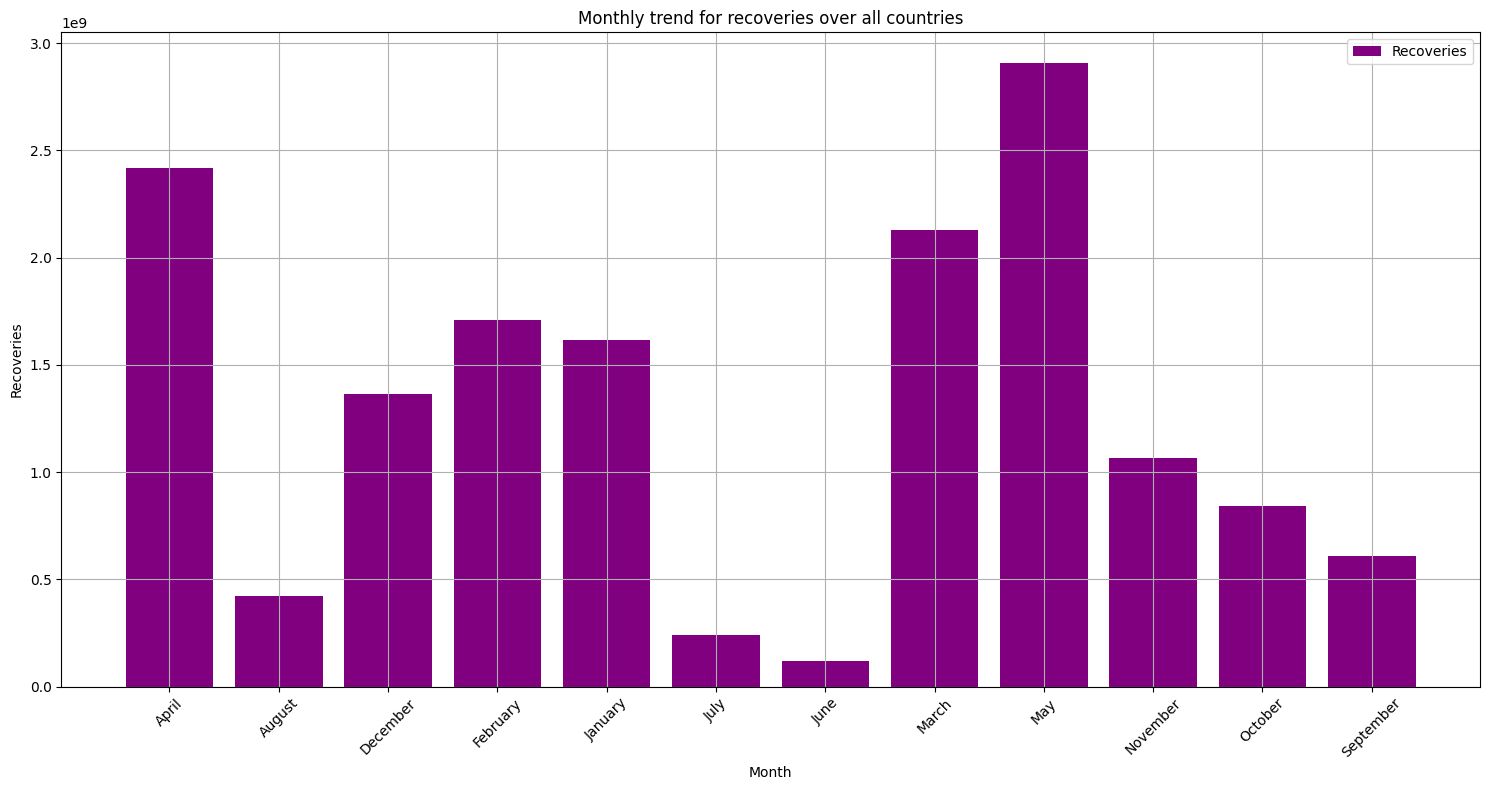

In [41]:
plt.figure(figsize=(15, 8))
plt.bar(combined_data2['Month'], combined_data2['recoveries'], label='Recoveries', color='purple')

plt.xlabel('Month')
plt.ylabel('Recoveries')
plt.title('Monthly trend for recoveries over all countries')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


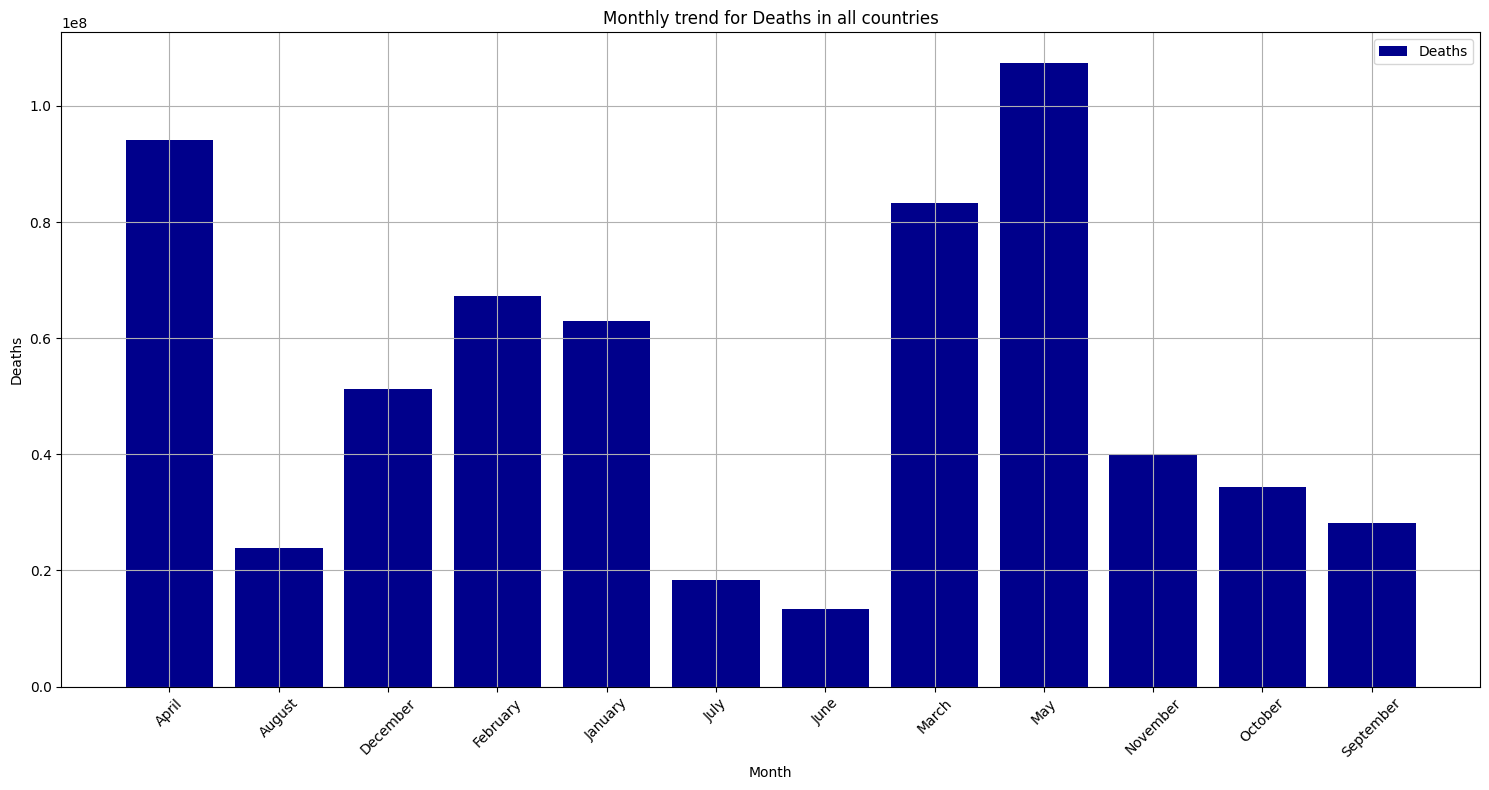

In [42]:
plt.figure(figsize=(15, 8))
plt.bar(combined_data2['Month'], combined_data2['deaths'], label='Deaths', color='darkblue')


plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Monthly trend for Deaths in all countries')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [43]:
countries = ['US', 'Italy', 'Brazil']
combined_data3 = combined_data[combined_data['Country/Region'].isin(countries)]
combined_data4 = combined_data3.groupby('Month')[['Confirmed Cases', 'deaths', 'recoveries']].sum().reset_index()
combined_data4

,Month,Confirmed Cases,deaths,recoveries
0,April,1.497845e+09,33173776.0,462718503.0
1,August,2.771809e+08,9710030.0,145583992.0
2,December,8.046826e+08,17425759.0,304465298.0
3,February,1.127145e+09,22969207.0,308894605.0
4,January,1.064999e+09,21459422.0,285708406.0
5,July,1.815738e+08,7783511.0,83957804.0
6,June,1.002412e+08,5956792.0,37500004.0
7,March,1.381233e+09,28820720.0,400558750.0
8,May,1.585487e+09,37435506.0,521580627.0
9,November,5.519581e+08,13876293.0,302133299.0


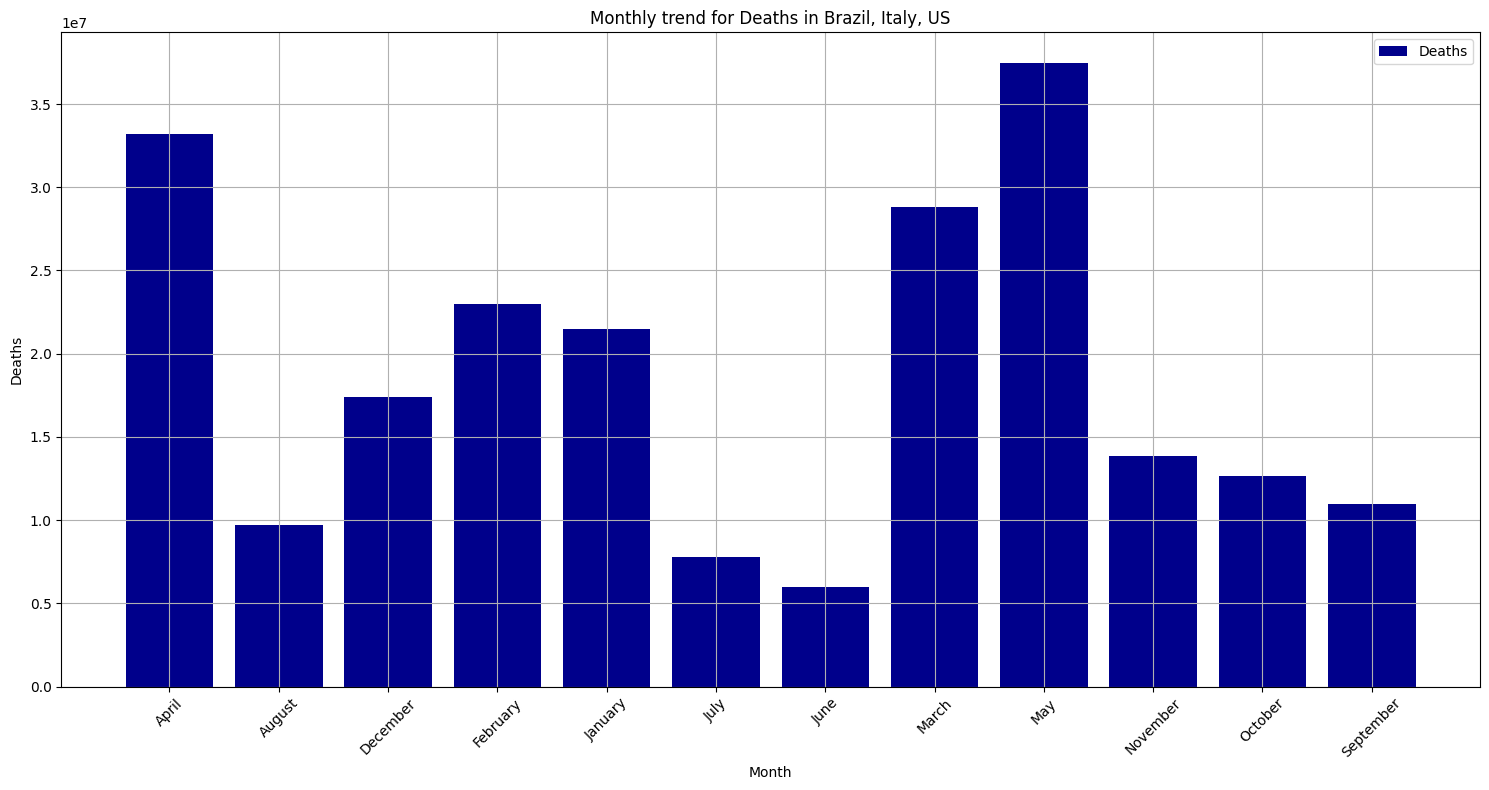

In [44]:
plt.figure(figsize=(15, 8))
plt.bar(combined_data4['Month'], combined_data4['deaths'], label='Deaths', color='darkblue')


plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Monthly trend for Deaths in Brazil, Italy, US')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

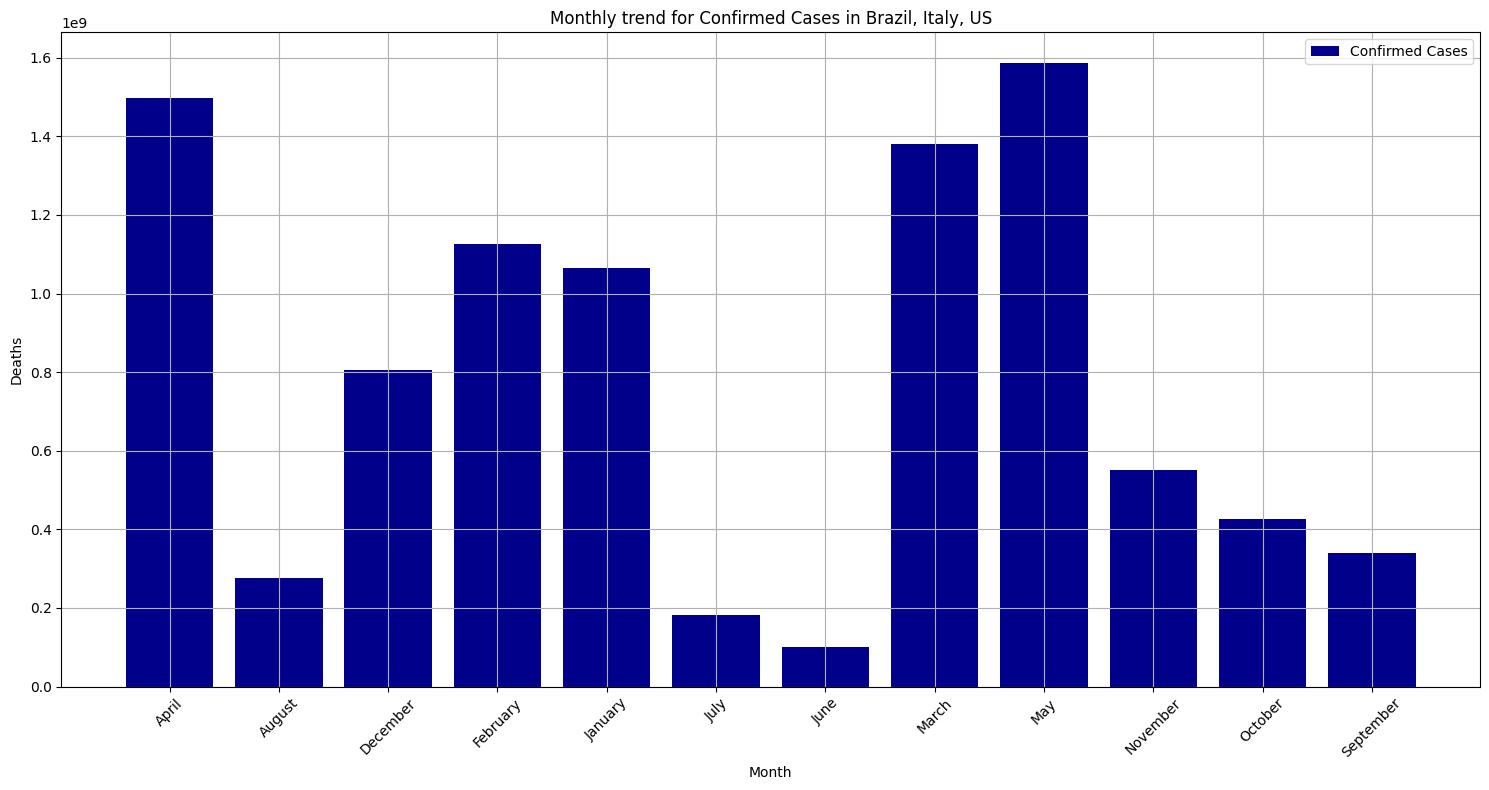

In [45]:
plt.figure(figsize=(15, 8))
plt.bar(combined_data4['Month'], combined_data4['Confirmed Cases'], label='Confirmed Cases', color='darkblue')


plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Monthly trend for Confirmed Cases in Brazil, Italy, US')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

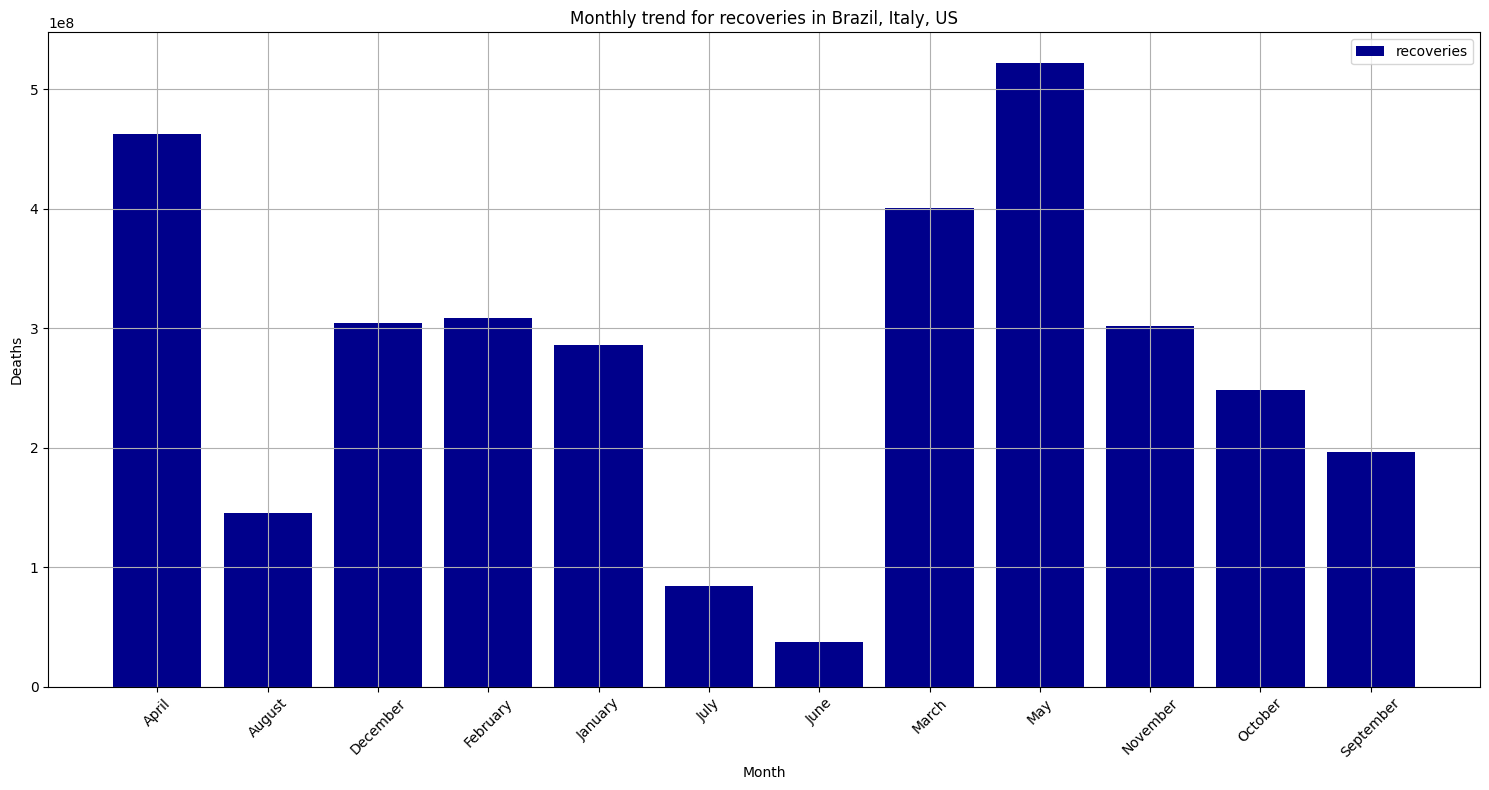

In [46]:
plt.figure(figsize=(15, 8))
plt.bar(combined_data4['Month'], combined_data4['recoveries'], label='recoveries', color='darkblue')


plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Monthly trend for recoveries in Brazil, Italy, US')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [66]:
combined_data_2020 = combined_data[combined_data['date']<='2020-12-31']
combined_data_2020

,Province/State,Country/Region,Lat,Long,date,Confirmed Cases,recoveries,deaths,Month
0,All Provinces,Afghanistan,33.939110,67.709953,2020-01-22,0.0,0.0,0.0,January
1,All Provinces,Afghanistan,33.939110,67.709953,2020-01-23,0.0,0.0,0.0,January
2,All Provinces,Afghanistan,33.939110,67.709953,2020-01-24,0.0,0.0,0.0,January
3,All Provinces,Afghanistan,33.939110,67.709953,2020-01-25,0.0,0.0,0.0,January
4,All Provinces,Afghanistan,33.939110,67.709953,2020-01-26,0.0,0.0,0.0,January
...,...,...,...,...,...,...,...,...,...
139154,All Provinces,Zimbabwe,-19.015438,29.154857,2020-12-27,13077.0,10593.0,349.0,December
139155,All Provinces,Zimbabwe,-19.015438,29.154857,2020-12-28,13148.0,10705.0,354.0,December
139156,All Provinces,Zimbabwe,-19.015438,29.154857,2020-12-29,13325.0,11067.0,359.0,December
139157,All Provinces,Zimbabwe,-19.015438,29.154857,2020-12-30,13625.0,11154.0,360.0,December


In [70]:
combined_data_20200 = combined_data_2020.groupby('Country/Region')[['Confirmed Cases', 'recoveries', 'deaths']].sum().reset_index()
combined_data_20200['death rate'] = combined_data_20200['deaths']/combined_data_20200['Confirmed Cases']
combined_data_20200_sorted = combined_data_20200.sort_values(by='death rate', ascending=False)
combined_data_20200_sorted.head(3)

,Country/Region,Confirmed Cases,recoveries,deaths,death rate
190,Yemen,382306.0,220558.0,108944.0,0.284965
105,MS Zaandam,2483.0,203.0,550.0,0.221506
115,Mexico,149022213.0,117649447.0,15017707.0,0.100775


In [74]:
combined_data_SA = combined_data[combined_data['Country/Region']=='South Africa']
combined_data_SA_grouped  = combined_data_SA.groupby('Country/Region')[['deaths', 'recoveries']].sum().reset_index()
combined_data_SA_grouped

,Country/Region,deaths,recoveries
0,South Africa,10250036.0,310037573.0


/tmp/ipykernel_3642/2000114318.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


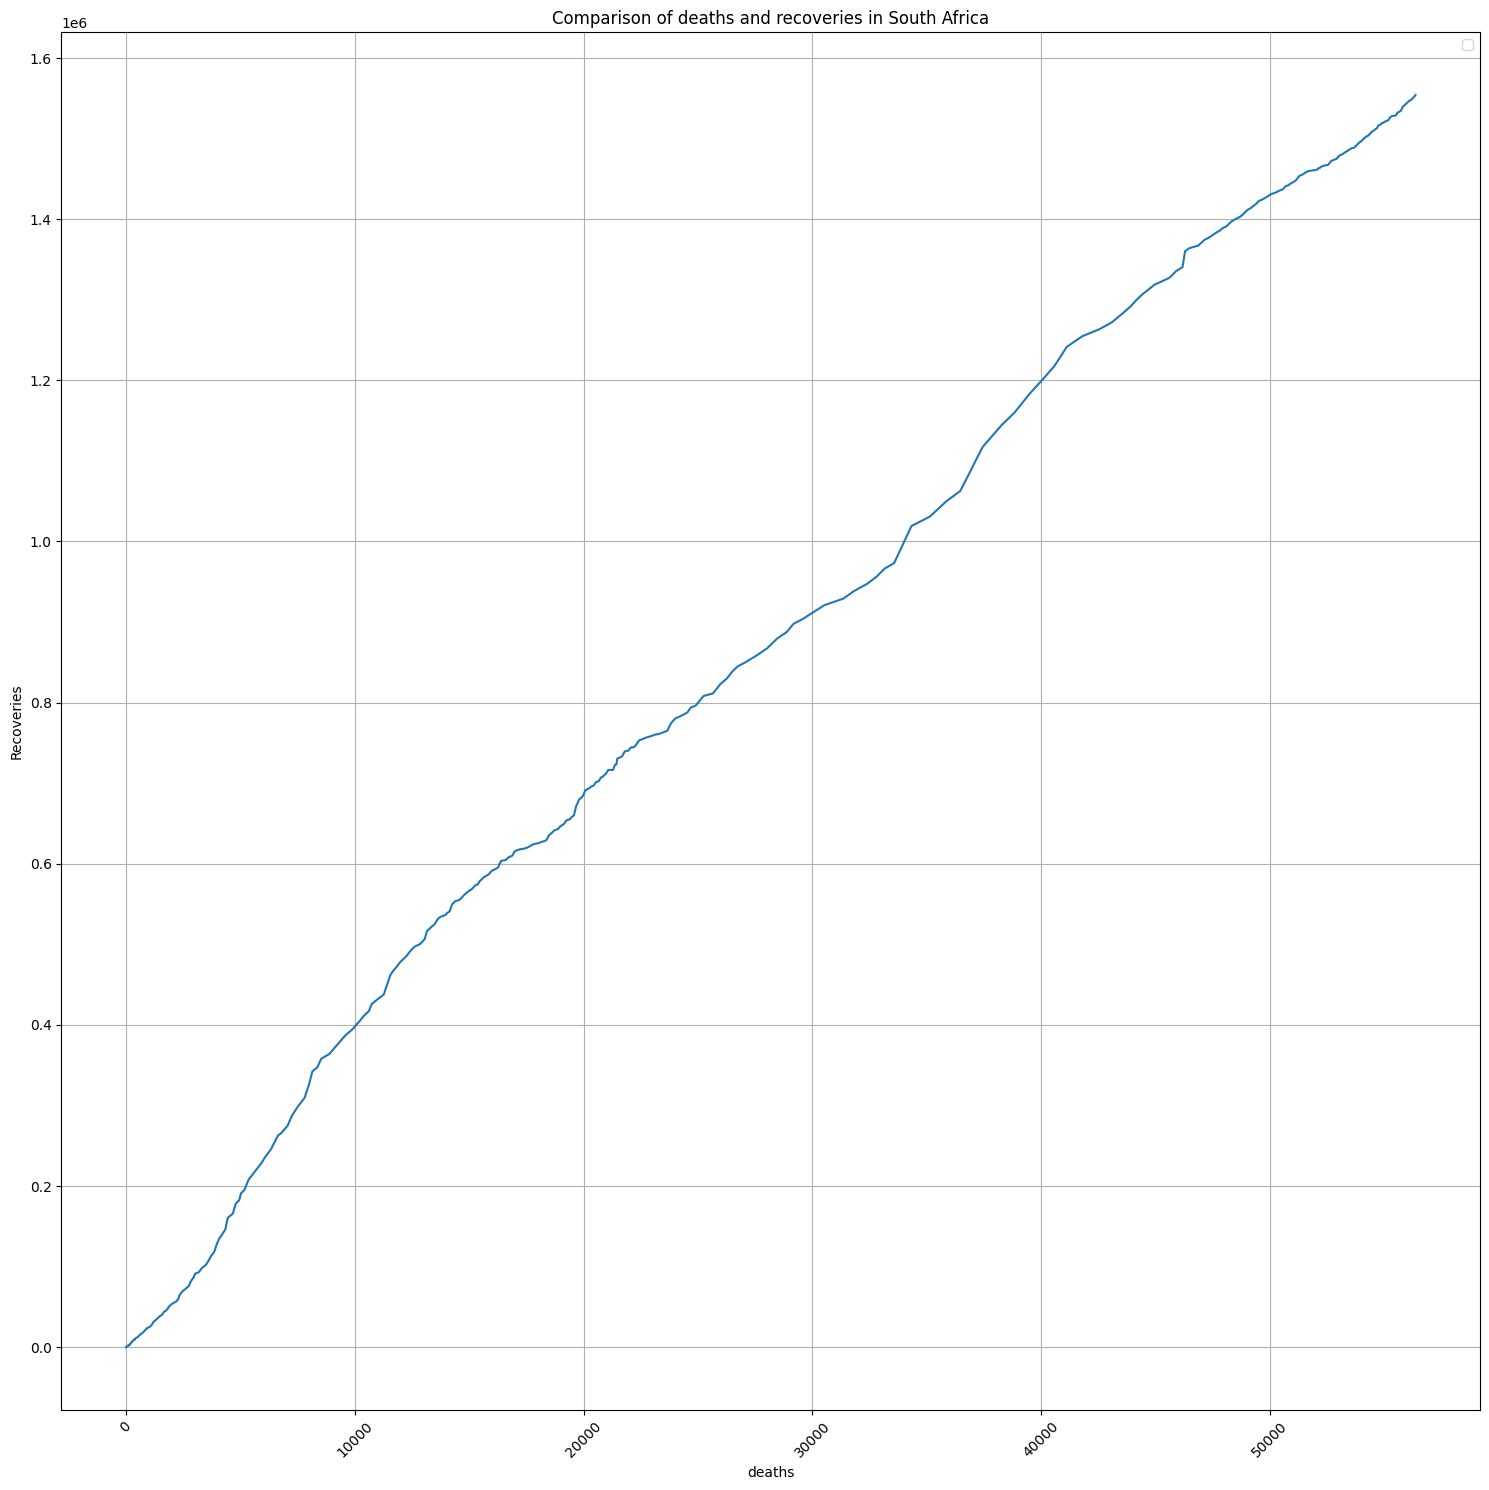

In [75]:
plt.figure(figsize=(15,15))
plt.plot(combined_data_SA['deaths'], combined_data_SA['recoveries'])

plt.xlabel('deaths')
plt.ylabel('Recoveries')
plt.title('Comparison of deaths and recoveries in South Africa')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [90]:
combined_data = combined_data[combined_data['date'] >= '2020-3-1']
combined_data_US = combined_data[combined_data['Country/Region']=='US']
combined_data_US['Ratio(Recover/Confirmed Cases)'] = combined_data_US['recoveries']/combined_data_US['Confirmed Cases']
combined_data_US


/tmp/ipykernel_3642/1839989855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_US['Ratio(Recover/Confirmed Cases)'] = combined_data_US['recoveries']/combined_data_US['Confirmed Cases']


,Province/State,Country/Region,Lat,Long,date,Confirmed Cases,recoveries,deaths,Month,Ratio(Recover/Confirmed Cases)
126997,All Provinces,US,40.0,-100.0,2020-03-01,32.0,7.0,1.0,March,0.218750
126998,All Provinces,US,40.0,-100.0,2020-03-02,55.0,7.0,6.0,March,0.127273
126999,All Provinces,US,40.0,-100.0,2020-03-03,74.0,7.0,7.0,March,0.094595
127000,All Provinces,US,40.0,-100.0,2020-03-04,107.0,7.0,11.0,March,0.065421
127001,All Provinces,US,40.0,-100.0,2020-03-05,184.0,7.0,12.0,March,0.038043
...,...,...,...,...,...,...,...,...,...,...
127447,All Provinces,US,40.0,-100.0,2021-05-25,33166418.0,0.0,590941.0,May,0.000000
127448,All Provinces,US,40.0,-100.0,2021-05-26,33190470.0,0.0,591950.0,May,0.000000
127449,All Provinces,US,40.0,-100.0,2021-05-27,33217995.0,0.0,593288.0,May,0.000000
127450,All Provinces,US,40.0,-100.0,2021-05-28,33239963.0,0.0,593963.0,May,0.000000


/tmp/ipykernel_3642/2106359388.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


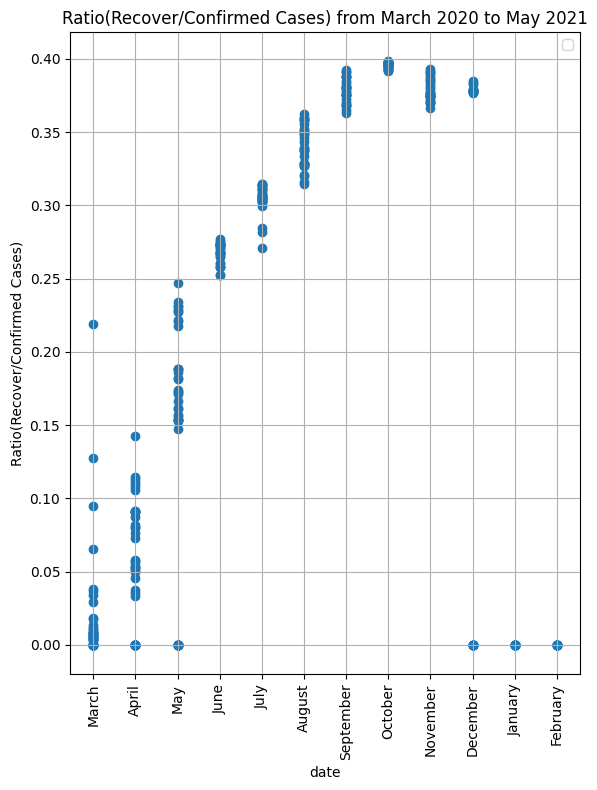

In [108]:
plt.figure(figsize=(6,8))
plt.scatter(combined_data_US['Month'], combined_data_US['Ratio(Recover/Confirmed Cases)'])

plt.xlabel('date')
plt.ylabel('Ratio(Recover/Confirmed Cases)')
plt.title('Ratio(Recover/Confirmed Cases) from March 2020 to May 2021')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()